In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
data = 'preprocessed_id.txt'
dataGraph = nx.read_edgelist(data)
type (dataGraph)
print(nx.info(dataGraph))

Name: 
Type: Graph
Number of nodes: 1445
Number of edges: 1379
Average degree:   1.9087


In [3]:
edgeList = pd.read_csv(data, sep="\t", header=None)
edgeList.head()

,0,1
0,1289956071537172484,1046084008742801408
1,1171388755,1046084008742801408
2,548904824,589687384
3,548904824,1246657358844923904
4,779784931,255409050


In [4]:
# Define graph as G
G = nx.Graph()

In [5]:
# Add edge list into graph

for i, edge in edgeList.iterrows():
    G.add_edge(edge[0], edge[1])

C:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


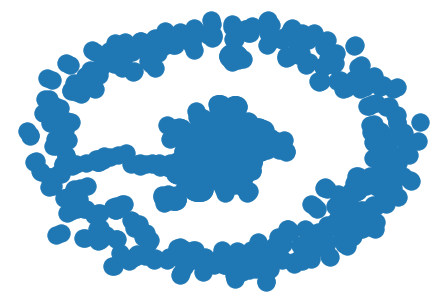

In [6]:
nx.draw(G)
plt.show()

In [7]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

    # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True) : 
        edge = key
        break
    return edge

In [8]:
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

In [9]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

In [10]:
node_groups

[[1046084008742801408,
  1153916332867383296,
  1285982672246804481,
  1259062781258563585,
  1289956071537172484,
  1205500580203880449,
  1286260034783965185,
  811322074098610176,
  1106809957586919424,
  1225084021035503616,
  1102269503772123137,
  1298830081876361218,
  1017048997121257479,
  1241016981865693186,
  1300217495190601736,
  1005567776029724678,
  2592311312,
  1248399448822046729,
  1194226675950616578,
  1252448470704652290,
  1203582603934105602,
  1281219739067482116,
  868460733943513092,
  1898000406,
  883689372633006085,
  2340702241,
  233453602,
  2390183970,
  80842796,
  17057839,
  2432018480,
  239306803,
  1072784059447689216,
  1218109158399983616,
  179382332,
  1192802581929582592,
  1070950532435468288,
  1932992576,
  1301064380264538112,
  888709182,
  1308303510211977216,
  22138948,
  1313449730,
  244577922,
  1068065299214163968,
  136566856,
  4839252042,
  720599813079896064,
  1195160942947913728,
  365850706,
  2930415702,
  1287139823124

In [11]:
len(node_groups)

205

In [13]:
len(node_groups[0])

899

In [14]:
url_color = "https://raw.githubusercontent.com/alfhi24/color-list/main/color_list.csv"
df_color = pd.read_csv(url_color)
hex_list = list(df_color['hex'])

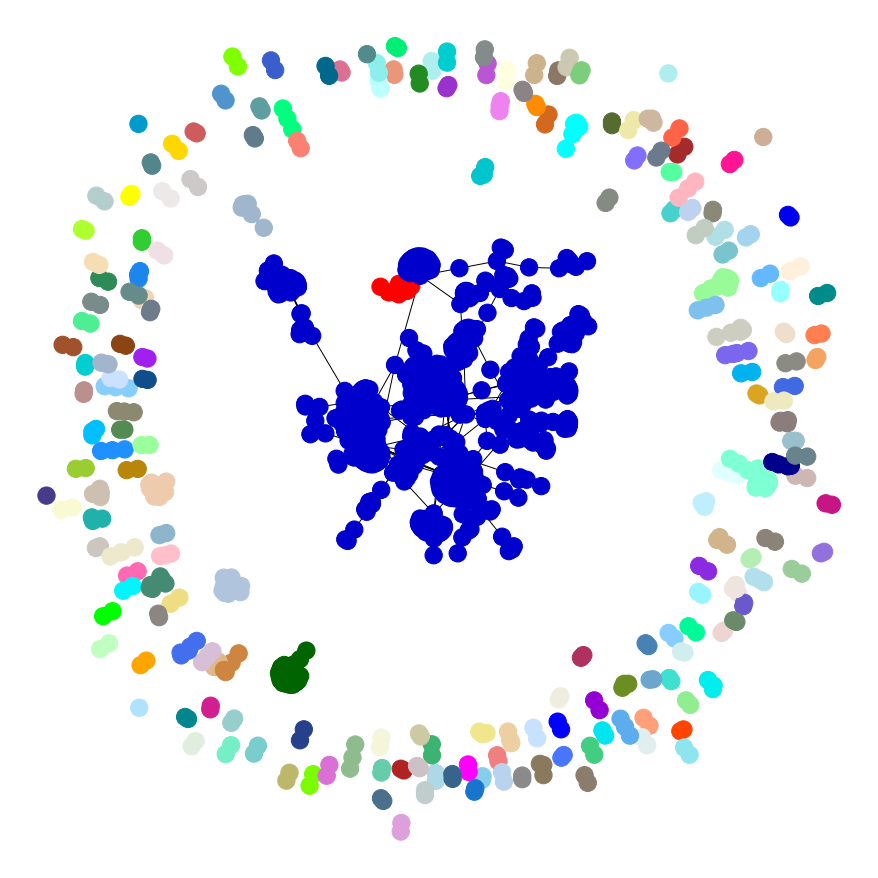

In [15]:
# plot the communities
color_map = []
i = 0
for node in G:
    for i in range(len(node_groups)) :
        if node in node_groups[i]:
            group = i
            color_map.append(hex_list[group+40])
    
plt.figure(figsize=(12,12))
nx.draw(G, node_color=color_map, with_labels=False)
plt.show()

In [19]:
node_groups[1]

[1306834920992436224, 790856528]

In [20]:
import tweepy
CONSUMER_KEY = "xjWvD2yPEDE4IajFZLD3Q7oGS"
CONSUMER_SECRET = "A8YoF9hBHHeJeyyyqP8AQlXviqo3PGPnhBBdXb6tafhvR4377p"
ACCESS_TOKEN = "942908072-njP8j7oMB9A6gjbPocXEdaKzKyUUZSZ769BQpQl5"
ACCESS_TOKEN_SECRET = "YnZm58q2WfvFFliKBlN1hMA2ZFlg3OphVldOGvgiWicvz"

auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET) 
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [25]:
name_groups = []
for group in node_groups : 
    names = []
    for node in group :
        try :
            user = api.get_user(node)
            screen_name = user.screen_name
            names.append(screen_name)
        except tweepy.TweepError : 
            names.append('user_not_found')
    name_groups.append(names)

In [29]:
name_groups[3]

['riangurs', 'fia', 'gayuh_ha16']

In [31]:
len_group = []
for group in node_groups :
    len_group.append(len(group))

In [46]:
df_community = pd.DataFrame(list(zip(name_groups,len_group)),
                            columns=['Community','Size of Community'])

In [47]:
df_community.head()

,Community,Size of Community
0,"[collegemenfess, marufamarr_, Tianananan, Slay...",899
1,"[mhmmdikhsan04, Polibatam]",2
2,"[lajandaa, fathurizalhbllh]",2
3,"[riangurs, fia, gayuh_ha16]",3
4,"[ind0mierendank, Ch0c00re0, gsnyfa]",3


In [48]:
df_community = df_community.sort_values(by='Size of Community', ascending=False)
df_community = df_community.reset_index(drop = True)
df_community.head()

,Community,Size of Community
0,"[collegemenfess, marufamarr_, Tianananan, Slay...",899
1,"[Kbrucen1, bgus_hrmawn, Sas_Gallagher, salmany...",40
2,"[bentengPerKaSa1, foxiehmh, Yusvannn, IrawatiA...",15
3,"[Fahri28fhr, hollyshielddd, maximus_syukur, My...",13
4,"[charamelinzeu, nisrinacy, maudlinamida, capri...",11


In [49]:
max_com = df_community['Size of Community'].max()
min_com = df_community['Size of Community'].min()
avg_com = df_community['Size of Community'].mean()
print('max community : ', max_com)
print('min community : ', min_com)
print('avg community : ', avg_com)

max community :  899
min community :  1
avg community :  7.048780487804878


In [50]:
df_community.to_csv("list_community.csv")